# Deep Learning with PyTorch

Deep learning is a fascinating field of study and the techniques are achieving world class results in a range of challenging machine learning problems. It can be hard to get started in deep learning.
Which library should you use and which techniques should you focus on?

## Mini-Course Overview

This mini-course is divided into 9 parts.

The topics you will cover over the next 9 lessons are as follows:

**- Lesson 1**: Introduction to PyTorch.
**- Lesson 2**: Build Your First Multilayer Perceptron Model
**- Lesson 3**: Training a PyTorch Model
**- Lesson 4**: Using a PyTorch Model for Inference
**- Lesson 5**: Loading Data from Torchvision
**- Lesson 6**: Using PyTorch DataLoader
**- Lesson 7**: Convolutional Neural Network
**- Lesson 8**: Train an Image Classifier
**- Lesson 9**: Train with GPU

## Lesson 01: Introduction to PyTorch

PyTorch is a Python library for deep learning computing created and released by Facebook. It has its root from an earlier library Torch 7 but completely rewritten.

It is one of the two most popular deep learning libraries. PyTorch is a complete library that has the capability to train a deep learning model as well as run a model in inference mode, and supports using GPU for faster training and inference. It is a platform that we cannot ignore.

In this lesson your goal is to install PyTorch become familiar with the syntax of the symbolic expressions used in PyTorch programs.
For example, you can install PyTorch using <code>pip</code>. The latest version of PyTorch at the time of writing is 2.0. There are PyTorch prebuilt for each platform, including Windows, Linux, and macOS. With a working Python environment, <code>pip</code> should take care of that for you to provide you the latest version in your platform.

Besides PyTorch, there is also the <code>torchvision</code> library that is commonly used together with PyTorch. It provides a lot of useful functions to help computer vision projects.

In [ ]:
sudo pip install torch torchvision

A small example of a PyTorch program that you can use as a starting point is listed below:

In [3]:
# Example of PyTorch library
import torch
# declare two symbolic floating-point scalars
a = torch.tensor(1.5)
b = torch.tensor(2.5)
# create a simple symbolic expression using the add function
c = torch.add(a, b)
print(c)

tensor(4.)


Learn more about PyTorch on the [PyTorch homepage](https://www.pytorch.org/).

## Lesson 02: Build Your First Multilayer Perceptron Model

Deep learning is about building large scale neural networks. The simplest form of neural network is called multilayer perceptron model. The building block for neural networks are artificial neurons or perceptrons. These are simple computational units that have weighted input signals and produce an output signal using an activation function.

Perceptrons are arranged into networks. A row of perceptrons is called a layer and one network can have multiple layers. The architecture of the perceptrons in the network is often called the network topology. Once configured, the neural network needs to be trained on your dataset. The classical and still preferred training algorithm for neural networks is called stochastic gradient descent.

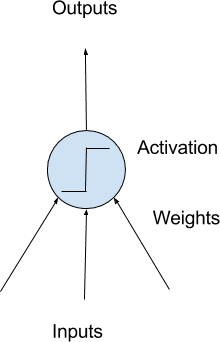

PyTorch allows you to develop and evaluate deep learning models in very few lines of code.

In the following, your goal is to develop your first neural network using PyTorch. Use a standard binary (two-class) classification dataset from the UCI Machine Learning Repository, like the [Pima Indians dataset](https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.data.csv).

To keep things simple, the network model is just a few layers of **fully-connected** perceptrons. In this particular model, the dataset has 12 inputs or **predictors** and the output is a single value of 0 or 1. Therefore, the network model should have 12 inputs (at the first layer) and 1 output (at the last layer). Your first model would be built as follows:

In [4]:
import torch.nn as nn

model = nn.Sequential(
  nn.Linear(8, 12),
  nn.ReLU(),
  nn.Linear(12, 8),
  nn.ReLU(),
  nn.Linear(8, 1),
  nn.Sigmoid()
)
print(model)

Sequential(
  (0): Linear(in_features=8, out_features=12, bias=True)
  (1): ReLU()
  (2): Linear(in_features=12, out_features=8, bias=True)
  (3): ReLU()
  (4): Linear(in_features=8, out_features=1, bias=True)
  (5): Sigmoid()
)


This is a network with 3 fully-connected layers. Each layer is created in PyTorch using the <code>nn.Linear(x, y)</code> syntax which the first argument is the number of input to the layer and the second is the number of output. Between each layer, a rectified linear activation is used, but at the output, sigmoid activation is applied such that the output value is between 0 and 1. This is a typical network. A deep learning model is to have a lot of such layers in a model.

## Lesson 03: Training a PyTorch Model

Building a neural network in PyTorch does not tell how you should train the model for a particular job. In fact, there are many variations in this aspect as described by the **hyperparameters**. In PyTorch, or all deep learning models in general, you need to decide the following on how to train a model:

- What is the dataset, specifically how the input and target looks like

- What is the loss function to evaluate the goodness of fit of the model to the data

- What is the optimization algorithm to train the model, and the parameters to the optimization algorithm such as learning rate and number of
iterations to train

In the previous lesson, the Pima Indian dataset is used and all the input are numbers. This would be the simplest case as you are not required to do any preprocessing of the data since neural networks can readily handle numbers.

Since it is a binary classification problem, the loss function should be binary cross entropy. It means that the target of the model output is 0 or 1 for the classification result. But in reality the model may output anything in between. The closer it is to the target value, the better (i.e., lower **loss**).

Gradient descent is the algorithm to optimize neural networks. There are many variations of gradient descent and Adam is one of the most used.

Implementing all the above, together with the model built in the previous lesson, the following is the code of the training process:

In [5]:
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim

dataset = np.loadtxt('pima-indians-diabetes.csv', delimiter=',')
X = dataset[:,0:8]
y = dataset[:,8]
X = torch.tensor(X, dtype=torch.float32)
y = torch.tensor(y, dtype=torch.float32).reshape(-1, 1)

loss_fn = nn.BCELoss() # binary cross-entropy
optimizer = optim.Adam(model.parameters(), lr=0.001)

n_epochs = 100
batch_size = 10
for epoch in range(n_epochs):
    for i in range(0, len(X), batch_size):
        Xbatch = X[i:i+batch_size]
        y_pred = model(Xbatch)
        ybatch = y[i:i+batch_size]
        loss = loss_fn(y_pred, ybatch)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
    print(f'Finished epoch {epoch}, latest loss {loss}')

Finished epoch 0, latest loss 0.5938032269477844
Finished epoch 1, latest loss 0.5658130645751953
Finished epoch 2, latest loss 0.5529212355613708
Finished epoch 3, latest loss 0.5407994985580444
Finished epoch 4, latest loss 0.5310658812522888
Finished epoch 5, latest loss 0.5164268016815186
Finished epoch 6, latest loss 0.5074374675750732
Finished epoch 7, latest loss 0.5025941133499146
Finished epoch 8, latest loss 0.4991707503795624
Finished epoch 9, latest loss 0.4926738440990448
Finished epoch 10, latest loss 0.489146888256073
Finished epoch 11, latest loss 0.48124074935913086
Finished epoch 12, latest loss 0.4745546579360962
Finished epoch 13, latest loss 0.4680787920951843
Finished epoch 14, latest loss 0.46532484889030457
Finished epoch 15, latest loss 0.4635985493659973
Finished epoch 16, latest loss 0.45680731534957886
Finished epoch 17, latest loss 0.4499308466911316
Finished epoch 18, latest loss 0.4441033601760864
Finished epoch 19, latest loss 0.4373527765274048
Finished

The for-loop above is to get a **batch** of data and feed into the model. Then observe the model’s output and calculate the loss function. Based on the loss function, the optimizer will fine-tune the model for one step, so it can match better to the training data. After a number of update steps, the model should be close enough to the training data that it can predict the target at a high accuracy.

## Lesson 04: Using a PyTorch Model for Inference

A trained neural network model is a model that remembered how the input and target related. Then, this model can predict the target given another input.

In PyTorch, a trained model can behave just like a function. Assume you have the model trained in the previous lesson, you can simply use it as follows:

In [6]:
i = 5
X_sample = X[i:i+1]
y_pred = model(X_sample)
print(f"{X_sample[0]} -> {y_pred[0]}")

tensor([  5.0000, 116.0000,  74.0000,   0.0000,   0.0000,  25.6000,   0.2010,
         30.0000]) -> tensor([0.2534], grad_fn=<SelectBackward0>)


But in fact, the better way of running inference is the following:

In [7]:
i = 5
X_sample = X[i:i+1]
model.eval()
with torch.no_grad():
    y_pred = model(X_sample)
print(f"{X_sample[0]} -> {y_pred[0]}")

tensor([  5.0000, 116.0000,  74.0000,   0.0000,   0.0000,  25.6000,   0.2010,
         30.0000]) -> tensor([0.2534])


Some model will behave differently between training and inference. The line of <code>model.eval()</code> is to signal the model that the intention is to run the model for inference. The line with <code>torch.no_grad()</code>  is to create a context for running the model, such that PyTorch knows calculating the gradient is not required. This can consume less resources.

This is also how you can evaluate the model. The model outputs a sigmoid value, which is between 0 and 1. You can interpret the value by rounding off the value to the closest integer (i.e., Boolean label). Comparing how often the prediction after round off match the target, you can assign an accuracy percentage to the model, as follows:

In [8]:
model.eval()
with torch.no_grad():
    y_pred = model(X)
accuracy = (y_pred.round() == y).float().mean()
print(f"Accuracy {accuracy}")

Accuracy 0.77734375


## Lesson 05: Loading Data from Torchvision

Torchvision is a sister library to PyTorch. In this library, there are functions specialized for image and computer vision. As you can expect, there are functions to help you read images or adjust the contrast. But probably most important is to provide an easy interface to get some image datasets.

In the next lesson, you will build a deep learning model to classify small images. This is a model that allows your computer to see what’s on an image. As you saw in the previous lessons, it is important to have the dataset to train the model. The dataset you’re going to use is CIFAR-10. It is a dataset of 10 different objects. There is a larger dataset called CIFAR-100, too.

The CIFAR-10 dataset can be downloaded from the Internet. But if you have torchvision installed, you just need to do the following:

In [ ]:
import matplotlib.pyplot as plt
import torchvision

trainset = torchvision.datasets.CIFAR10(root='./data', train=True, download=True)
testset = torchvision.datasets.CIFAR10(root='./data', train=False, download=True)

fig, ax = plt.subplots(4, 6, sharex=True, sharey=True, figsize=(12,8))
for i in range(0, 24):
    row, col = i//6, i%6
    ax[row][col].imshow(trainset.data[i])
plt.show()

The <code>torchvision.datasets.CIFAR10</code> function helps you to download the CIFAR-10 dataset to a local directory. The dataset is divided into training set and test set. Therefore the two lines above is to get both of them. Then you plot the first 24 images from the downloaded dataset. Each image in the dataset is 32×32 pixels picture of one of the following: airplane, automobile, bird, cat, deer, dog, frog, horse, ship, or truck.

## Lesson 06: Using PyTorch DataLoader

The CIFAR-10 image from the previous lesson is indeed in the format of numpy array. But for consumption by a PyTorch model, it needs to be in PyTorch tensors. It is not difficult to convert a numpy array into PyTorch tensor but in the training loop, you still need to divide the dataset in batches. The PyTorch DataLoader can help you make this process smoother.

Back to the CIFAR-10 dataset as loaded in the previous lesson, you can do the following for the identical effect:

In [ ]:
import matplotlib.pyplot as plt
import torchvision
import torch
from torchvision.datasets import CIFAR10

transform = torchvision.transforms.Compose([torchvision.transforms.ToTensor()])
trainset = CIFAR10(root='./data', train=True, download=True, transform=transform)
testset = CIFAR10(root='./data', train=False, download=True, transform=transform)

batch_size = 24
trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size, shuffle=True)
testloader = torch.utils.data.DataLoader(testset, batch_size=batch_size, shuffle=True)

fig, ax = plt.subplots(4, 6, sharex=True, sharey=True, figsize=(12,8))
for images, labels in trainloader:
    for i in range(batch_size):
        row, col = i//6, i%6
        ax[row][col].imshow(images[i].numpy().transpose([1,2,0]))
    break  # take only the first batch
plt.show()

In this code, <code>trainset</code> is created with transform argument so that the data is converted into PyTorch tensor when it is extracted. This is performed in <code>DataLoader</code> the lines following it. The <code>DataLoader</code> object is a Python iterable, which you can extract the input (which are images) and target (which are integer class labels). In this case, you set the batch size to 24 and iterate for the first batch. Then you show each image in the batch.

## Lesson 07: Convolutional Neural Network

Images are 2D structures. You can easily convert them into 1D vectors by flattening it and build a neural network model to classify them. But it is known that preserving the 2D structure would be more appropriate because the classification is about what’s in the image, which is **translation invariant**.

The standard way for image processing neural network is to use convolutional layers. A neural network that uses convolutional layers is called a convolutional neural network. An example is as follows:

In [1]:
import torch.nn as nn

model = nn.Sequential(
    nn.Conv2d(3, 32, kernel_size=(3,3), stride=1, padding=1),
    nn.ReLU(),
    nn.Dropout(0.3),
    nn.Conv2d(32, 32, kernel_size=(3,3), stride=1, padding=1),
    nn.ReLU(),
    nn.MaxPool2d(kernel_size=(2, 2)),
    nn.Flatten(),
    nn.Linear(8192, 512),
    nn.ReLU(),
    nn.Dropout(0.5),
    nn.Linear(512, 10)
)
print(model)

Sequential(
  (0): Conv2d(3, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (1): ReLU()
  (2): Dropout(p=0.3, inplace=False)
  (3): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (4): ReLU()
  (5): MaxPool2d(kernel_size=(2, 2), stride=(2, 2), padding=0, dilation=1, ceil_mode=False)
  (6): Flatten(start_dim=1, end_dim=-1)
  (7): Linear(in_features=8192, out_features=512, bias=True)
  (8): ReLU()
  (9): Dropout(p=0.5, inplace=False)
  (10): Linear(in_features=512, out_features=10, bias=True)
)


In the above, we used <code>Conv2d</code> layers several times, as well as <code>ReLU</code> activation. The convolutional layers are to learn and extract **features** from image. More convolutional layers you add, the network can learn more high-level features. Eventually, you would use a pooling layer (<code>MaxPool2d</code> above) to group the extracted features, flatten them into a vector, then pass it on to a multilayer perceptron network for final classification. This is the usual structure of an image classification model.

## Lesson 08: Train an Image Classifier

Together with the DataLoader created for CIFAR-10 dataset, you can train the convolutional neural network in the previous lesson with the following training loop:

In [ ]:
import torch.nn as nn
import torch.optim as optim

loss_fn = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.001, momentum=0.9)

n_epochs = 20
for epoch in range(n_epochs):
    model.train()
    for inputs, labels in trainloader:
        y_pred = model(inputs)
        loss = loss_fn(y_pred, labels)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
    acc = 0
    count = 0
    model.eval()
    with torch.no_grad():
        for inputs, labels in testloader:
            y_pred = model(inputs)
            acc += (torch.argmax(y_pred, 1) == labels).float().sum()
            count += len(labels)
    acc /= count
    print("Epoch %d: model accuracy %.2f%%" % (epoch, acc*100))

This will take a while to run, and you should see the model produced can achieve no less than 70% accuracy.

This model is a multiclass classification network. The output is not one, but many scores, one for each class. We consider the higher score the more confident the model thinks the image belongs to a class. The loss function used is therefore **cross-entropy**, the multiclass version of binary cross-entropy.

In the training loop above, you should see quite many elements you learned in the previous lessons. Including switching between training and inference mode in the model, using <code>torch.no_grad()</code> context, and calculation of the accuracy.

## Lesson 09: Train with GPU

The model training you did in the previous lesson should take a while. If you have a supported GPU, you can speed up the training a lot.

The way to use GPU in PyTorch is to send the model and data to GPU before execution. Then you have an option to send back the result from GPU, or perform the evaluation in GPU directly.

It is not difficult to modify the code from the previous lesson to use GPU. Below is what it should be done:

In [ ]:
import torch.nn as nn
import torch.optim as optim

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
model.to(device)

loss_fn = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.001, momentum=0.9)

n_epochs = 20
for epoch in range(n_epochs):
    model.train()
    for inputs, labels in trainloader:
        y_pred = model(inputs.to(device))
        loss = loss_fn(y_pred, labels.to(device))
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
    acc = 0
    count = 0
    model.eval()
    with torch.no_grad():
        for inputs, labels in testloader:
            y_pred = model(inputs.to(device))
            acc += (torch.argmax(y_pred, 1) == labels.to(device)).float().sum()
            count += len(labels)
    acc /= count
    print("Epoch %d: model accuracy %.2f%%" % (epoch, acc*100))

The changes made are the following: You check if GPU is available and set the <code>device</code> accordingly. Then the model is sent to the device. When the input (i.e., a batch of images) is pass on to the model, it should be sent to the corresponding device first. Since the model output will also be there, the loss calculation or the accuracy calculation should also have the target sent to the GPU first.

## Summary

Take a moment and look back at how far you have come.

- You discovered PyTorch as a deep learning library in Python

- You built your first neural network using PyTorch and learned how to do classification with a neural network

- You learned key components in deep learning, including loss function, optimizer, training loop, and evaluation

- Finally, you took the next step and learned about and developed convolutional neural networks for computer vision tasks